In [27]:
import pandas as pd
from multiprocessing import Pool
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Nimbus Sans'
plt.rcParams['font.size'] = 9

In [148]:
stim_ints = pd.read_csv('csvs/stimulus_intervals.csv', index_col=False)
stim_ints['interval'] = stim_ints['interval'].apply(lambda x: pd.Interval(pd.Timestamp(x.split(', ')[0].strip('[')), 
                                                            pd.Timestamp(x.split(', ')[1].strip(')')), 
                                                            closed='left'))

In [141]:
treatment_times = pd.read_csv('csvs/treatment_times_fixed.csv', index_col=False)
treatment_times['datetime'] = pd.to_datetime(treatment_times['datetime'], format= "%Y-%m-%d %H:%M:%S")
treatment_times = treatment_times.drop(columns='date')

In [142]:
df = treatment_times.sort_values(by=['pi', 'color', 'datetime'])
df['time_diff'] = df.groupby(['pi', 'color'])['datetime'].diff()
df['new_period'] = (df['time_diff'] > pd.Timedelta(minutes=1)) | df['time_diff'].isna()
df['period_id'] = df.groupby(['pi', 'color'])['new_period'].cumsum()
cam_on = df.groupby(['pi', 'color', 'period_id']).agg(start_time=('datetime', 'min'), end_time=('datetime', 'max')).reset_index()



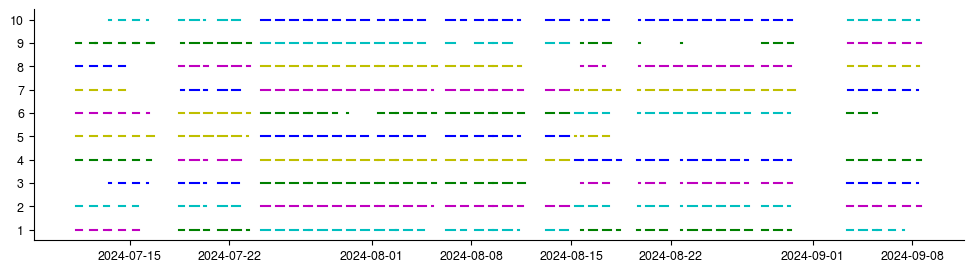

In [ ]:
color_map = {
    'cnt': 'm',
    'blu': 'b',
    'blv': 'c',
    'grn': 'g',
    'yel': 'y'
}

fig, ax = plt.subplots(figsize=(12, 3))
pi_values = {pi: i for i, pi in enumerate(cam_on['pi'].unique())}
for idx, row in cam_on.iterrows():
    y = pi_values[row['pi']]
    color = color_map.get(row['color'])
    ax.plot([row['start_time'], row['end_time']], [y, y], label=f"{row['color']} ({row['pi']})", color=color)

ax.set_yticks(list(pi_values.values()))
ax.set_yticklabels(list(pi_values.keys()))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


In [4]:
# camera_timeline = treatment_times.copy()[['pi', 'datetime', 'color']]
# camera_timeline = camera_timeline.sort_values(by=['pi', 'datetime'])

# filled_df = pd.DataFrame(columns=camera_timeline.columns)
# for pi_val in camera_timeline['pi'].unique():
#     pi_data = camera_timeline[camera_timeline['pi'] == pi_val]
#     for i in range(len(pi_data) - 1):
#         current_time = pi_data.iloc[i]['datetime']
#         next_time = pi_data.iloc[i + 1]['datetime']
#         if (next_time - current_time).total_seconds() > 1 and (next_time - current_time).total_seconds() <= 10:
#             new_times = pd.date_range(start=current_time + pd.Timedelta(seconds=1),
#                                       end=next_time - pd.Timedelta(seconds=1), freq='S')
#             new_rows = pd.DataFrame({'pi': [pi_val] * len(new_times), 'datetime': new_times})
#             filled_df = pd.concat([filled_df, new_rows], ignore_index=True)
#     filled_df = pd.concat([filled_df, pi_data], ignore_index=True)

# filled_df = filled_df.sort_values(by=['pi', 'datetime']).reset_index(drop=True)

# filled_df




In [5]:
# def process_pi(pi_val):
#     pi_data = camera_timeline[camera_timeline['pi'] == pi_val]
#     filled_pi_df = pd.DataFrame(columns=camera_timeline.columns)
#     for i in range(len(pi_data) - 1):
#         current_time = pi_data.iloc[i]['datetime']
#         next_time = pi_data.iloc[i + 1]['datetime']
#         if 1 < (next_time - current_time).total_seconds() <= 10:
#             new_times = pd.date_range(start=current_time + pd.Timedelta(seconds=1),
#                                       end=next_time - pd.Timedelta(seconds=1), freq='S')
#             new_rows = pd.DataFrame({'pi': [pi_val] * len(new_times), 'datetime': new_times})
#             filled_pi_df = pd.concat([filled_pi_df, new_rows], ignore_index=True)
#     return pd.concat([filled_pi_df, pi_data], ignore_index=True)

# with Pool(processes=10) as pool:
#     results = pool.map(process_pi, camera_timeline['pi'].unique())

# filled_df = pd.concat(results, ignore_index=True)
# filled_df = filled_df.sort_values(by=['pi', 'datetime']).reset_index(drop=True)




In [6]:
# filled_df.to_csv('csvs/camera_timeline.csv', index=False)

# camera_timeline = pd.read_csv('csvs/camera_timeline.csv')
# camera_timeline['datetime'] = pd.to_datetime(camera_timeline['datetime'])
# camera_timeline = pd.merge(camera_timeline, treatment_times[['pi', 'datetime', 'color']], on=['pi', 'datetime'], how='left')

In [7]:
# camera_timeline['color_ffill'] = camera_timeline['color'].ffill()
# camera_timeline['color_bfill'] = camera_timeline['color'].bfill()

# camera_timeline['datetime_ffill'] = camera_timeline['datetime'].where(camera_timeline['color'].notna()).ffill()
# camera_timeline['datetime_bfill'] = camera_timeline['datetime'].where(camera_timeline['color'].notna()).bfill()

# def nearest_color(row):
#     if pd.isna(row['color']):
#         delta_forward = abs(row['datetime'] - row['datetime_ffill'])
#         delta_backward = abs(row['datetime'] - row['datetime_bfill'])
#         if delta_forward <= delta_backward:
#             return row['color_ffill']
#         else:
#             return row['color_bfill']
#     else:
#         return row['color']

# camera_timeline['color'] = camera_timeline.apply(nearest_color, axis=1)

# camera_timeline.drop(['color_ffill', 'color_bfill', 'datetime_ffill', 'datetime_bfill'], axis=1, inplace=True)



In [8]:
# camera_timeline.to_csv('csvs/camera_timeline.csv', index=False)

In [9]:
camera_timeline = pd.read_csv('csvs/camera_timeline.csv')
camera_timeline['datetime'] = pd.to_datetime(camera_timeline['datetime'])

In [58]:
# color_map = {
#     'cnt': 'm',
#     'blu': 'b',
#     'blv': 'c',
#     'grn': 'g',
#     'yel': 'y'
# }

# mapped_colors = camera_timeline['color'].map(color_map)


# fig, ax = plt.subplots(figsize=(30, 3))

# plt.scatter(camera_timeline['datetime'], camera_timeline['pi'], marker='|', c=mapped_colors)

In [11]:
bombus_df = pd.read_csv('csvs/clean_dfs/bombus_df.csv')
bombus_df['datetime'] = pd.to_datetime(bombus_df['datetime'])
bombus_df = pd.merge(bombus_df, treatment_times[['pi', 'datetime', 'color']], on=['pi', 'datetime'], how='left')
bombus_df['new_visit'] = (bombus_df['time_diff'] > 4) | (bombus_df['time_diff'].isna())
bombus_df['visit_id'] = bombus_df.groupby(['species'])['new_visit'].cumsum()

visit_durations = (
    bombus_df.groupby(['species', 'visit_id', 'pi', 'color'])['datetime']
    .agg(visit_start='min', visit_end='max')
    .reset_index()
)
visit_durations['duration'] = (
    (visit_durations['visit_end'] - visit_durations['visit_start']).dt.total_seconds()
)

In [12]:
visit_times = visit_durations[['visit_start', 'visit_end']]
visit_times

,visit_start,visit_end
0,2024-07-28 17:25:26,2024-07-28 17:25:26
1,2024-07-11 09:02:37,2024-07-11 09:02:37
2,2024-07-11 09:55:06,2024-07-11 09:55:06
3,2024-07-11 10:40:47,2024-07-11 10:40:47
4,2024-07-11 12:06:41,2024-07-11 12:06:41
...,...,...
293,2024-07-28 16:20:48,2024-07-28 16:20:48
294,2024-08-09 14:46:33,2024-08-09 14:46:33
295,2024-08-20 12:03:52,2024-08-20 12:03:52
296,2024-08-16 09:52:07,2024-08-16 09:52:07


In [94]:
cam_on

,pi,color,period_id,start_time,end_time,interval
0,1,blv,1,2024-07-23 05:01:05,2024-07-23 08:23:27,"[2024-07-23 05:01:05, 2024-07-23 08:23:27]"
1,1,blv,2,2024-07-23 20:31:59,2024-07-23 20:31:59,"[2024-07-23 20:31:59, 2024-07-23 20:31:59]"
2,1,blv,3,2024-07-24 06:00:57,2024-07-24 19:59:59,"[2024-07-24 06:00:57, 2024-07-24 19:59:59]"
3,1,blv,4,2024-07-25 06:00:57,2024-07-25 19:36:52,"[2024-07-25 06:00:57, 2024-07-25 19:36:52]"
4,1,blv,5,2024-07-25 19:48:42,2024-07-25 19:49:24,"[2024-07-25 19:48:42, 2024-07-25 19:49:24]"
...,...,...,...,...,...,...
1291,10,blv,125,2024-09-05 06:01:09,2024-09-05 12:15:14,"[2024-09-05 06:01:09, 2024-09-05 12:15:14]"
1292,10,blv,126,2024-09-05 12:16:50,2024-09-05 18:59:59,"[2024-09-05 12:16:50, 2024-09-05 18:59:59]"
1293,10,blv,127,2024-09-06 08:01:04,2024-09-06 18:59:59,"[2024-09-06 08:01:04, 2024-09-06 18:59:59]"
1294,10,blv,128,2024-09-07 08:01:06,2024-09-07 18:59:59,"[2024-09-07 08:01:06, 2024-09-07 18:59:59]"


In [92]:
visit_times['interval'] = pd.IntervalIndex.from_arrays(visit_times['visit_start'], visit_times['visit_end'], closed='both')
visit_times

,visit_start,visit_end,interval
0,2024-07-28 17:25:26,2024-07-28 17:25:26,"[2024-07-28 17:25:26, 2024-07-28 17:25:26]"
1,2024-07-11 09:02:37,2024-07-11 09:02:37,"[2024-07-11 09:02:37, 2024-07-11 09:02:37]"
2,2024-07-11 09:55:06,2024-07-11 09:55:06,"[2024-07-11 09:55:06, 2024-07-11 09:55:06]"
3,2024-07-11 10:40:47,2024-07-11 10:40:47,"[2024-07-11 10:40:47, 2024-07-11 10:40:47]"
4,2024-07-11 12:06:41,2024-07-11 12:06:41,"[2024-07-11 12:06:41, 2024-07-11 12:06:41]"
...,...,...,...
293,2024-07-28 16:20:48,2024-07-28 16:20:48,"[2024-07-28 16:20:48, 2024-07-28 16:20:48]"
294,2024-08-09 14:46:33,2024-08-09 14:46:33,"[2024-08-09 14:46:33, 2024-08-09 14:46:33]"
295,2024-08-20 12:03:52,2024-08-20 12:03:52,"[2024-08-20 12:03:52, 2024-08-20 12:03:52]"
296,2024-08-16 09:52:07,2024-08-16 09:52:07,"[2024-08-16 09:52:07, 2024-08-16 09:52:07]"


In [102]:
def run_simulation(cam_on, visit_times):
    visit_times['pi'] = np.random.randint(1, 11, len(visit_times))

    color_counts = pd.Series(dtype=int)
    for _, visit in visit_times.iterrows():
        pi = visit['pi']
        visit_interval = visit['interval']
        relevant_cams = cam_on[cam_on['pi'] == pi]
        for _, cam in relevant_cams.iterrows():
            cam_interval = cam['interval']
            if visit_interval.overlaps(cam_interval):
                color = cam['color']
                if color in color_counts:
                    color_counts[color] += 1
                else:
                    color_counts[color] = 1
    return color_counts

visit_counts = run_simulation(cam_on, visit_times)
visit_counts

grn    70
cnt    58
yel    57
blu    36
blv    42
dtype: int64

In [135]:
def run_simulation(cam_on, visit_times, num_pis=10, iterations=1):
    results = []

    for _ in range(iterations):

        visit_times['pi'] = np.random.randint(1, 11, len(visit_times))

        color_counts = pd.Series(dtype=int)

        for _, visit in visit_times.iterrows():
            pi = visit['pi']
            visit_interval = visit['interval']
            relevant_cams = cam_on[cam_on['pi'] == pi]

            for _, cam in relevant_cams.iterrows():
                cam_interval = cam['interval']
                if visit_interval.overlaps(cam_interval):
                    color = cam['color']
                    color_counts[color] = color_counts.get(color, 0) + 1

        results.append(color_counts)

    final_results = pd.concat(results, axis=1).fillna(0).astype(int).T

    return final_results

simulation_results = run_simulation(cam_on, visit_times, iterations=10000)
simulation_results

,cnt,grn,blv,blu,yel
0,61,52,50,48,56
1,53,50,62,42,56
2,60,58,46,55,48
3,48,54,46,52,54
4,51,57,55,40,51
...,...,...,...,...,...
9995,55,74,41,52,45
9996,66,49,51,45,48
9997,73,54,49,35,51
9998,61,59,45,43,49


In [137]:
simulation_results.to_csv('simresults_int_10000.csv', index=False)

56.2791
54.8392
49.0284
44.8247
54.7777


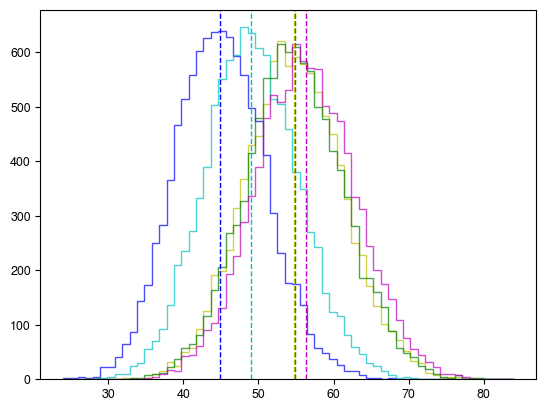

In [139]:
colors = [color_map[col] for col in simulation_results.columns]
plt.hist(simulation_results.values, bins=simulation_results.values.max() - simulation_results.values.min()+1, color=colors, histtype='step', alpha=0.7, label=df.columns)
for col, color in zip(simulation_results.columns, colors):
    plt.axvline(simulation_results[col].mean(), color=color, linestyle='dashed', linewidth=1)
    print(simulation_results[col].mean())

plt.show()

In [13]:
))

SyntaxError: unmatched ')' (840618910.py, line 1)

In [18]:
import gc

In [22]:
def simulate_shuffles(num_iterations):
    # results = []
    total_color_counts = {}
    
    unique_pis = np.arange(1,11).tolist()
    visit_times_pi = visit_times.copy()
    visit_times_pi['pi'] = None

    for _ in range(num_iterations):
        selected_pis = np.random.choice(unique_pis, size=len(visit_times))
        visit_times_pi['pi'] = pd.Categorical(selected_pis, categories=unique_pis)

        for index, visit in visit_times_pi.iterrows():
            pi_visit = visit['pi']
            visit_start = visit['visit_start']
            visit_end = visit['visit_end']

            matching_entries = camera_timeline[
                (camera_timeline['pi'] == pi_visit) &
                (camera_timeline['datetime'] >= visit_start) &
                (camera_timeline['datetime'] <= visit_end)
            ]

            if not matching_entries.empty:
                unique_colors = matching_entries['color'].drop_duplicates()
                for color in unique_colors:
                    if color in total_color_counts:
                        total_color_counts[color] += 1
                    else:
                        total_color_counts[color] = 1

    return total_color_counts



    #         if not matching_entries.empty:
    #             unique_colors = matching_entries['color'].drop_duplicates()
    #             color_counts = {color: 1 for color in unique_colors}
    #             results.append(color_counts)
    #         else:
    #             results.append({})
            
    #         del matching_entries
    #         gc.collect()
        
    #     del selected_pis
    #     gc.collect()

    # del visit_times_pi, unique_pis
    # gc.collect()
    # return results

simulation_results = simulate_shuffles(1)
simulation_results

{'cnt': 52, 'blu': 50, 'yel': 59, 'grn': 52, 'blv': 43}

In [29]:
from concurrent.futures import ThreadPoolExecutor

In [39]:
def simulate_single_shuffle(unique_pis, visit_times):
    visit_times_pi = visit_times.copy()
    selected_pis = np.random.choice(unique_pis, size=len(visit_times))
    visit_times_pi['pi'] = pd.Categorical(selected_pis, categories=unique_pis)
    
    total_color_counts = {}
    for index, visit in visit_times_pi.iterrows():
        pi_visit = visit['pi']
        visit_start = visit['visit_start']
        visit_end = visit['visit_end']

        matching_entries = camera_timeline[
            (camera_timeline['pi'] == pi_visit) &
            (camera_timeline['datetime'] >= visit_start) &
            (camera_timeline['datetime'] <= visit_end)
        ]

        if not matching_entries.empty:
            unique_colors = matching_entries['color'].drop_duplicates()
            for color in unique_colors:
                if color in total_color_counts:
                    total_color_counts[color] += 1
                else:
                    total_color_counts[color] = 1
    return total_color_counts

def simulate_shuffles(num_iterations):
    unique_pis = np.arange(1,11).tolist()
    
    results = []
    with ThreadPoolExecutor(max_workers=12) as executor:
        futures = [executor.submit(simulate_single_shuffle, unique_pis, visit_times) for _ in range(num_iterations)]
        for future in futures:
            results.append(future.result())

    return results

simulation_results = simulate_shuffles(100)
simulation_results

[{'yel': 66, 'cnt': 57, 'blu': 38, 'blv': 52, 'grn': 54},
 {'blv': 39, 'yel': 56, 'blu': 48, 'grn': 50, 'cnt': 63},
 {'yel': 53, 'blv': 46, 'cnt': 58, 'grn': 66, 'blu': 38},
 {'blv': 55, 'blu': 44, 'yel': 46, 'grn': 64, 'cnt': 46},
 {'yel': 55, 'grn': 65, 'cnt': 65, 'blv': 39, 'blu': 42},
 {'blu': 42, 'grn': 57, 'blv': 48, 'yel': 47, 'cnt': 61},
 {'grn': 46, 'cnt': 53, 'blv': 56, 'yel': 73, 'blu': 41},
 {'cnt': 54, 'yel': 63, 'blv': 51, 'grn': 53, 'blu': 53},
 {'blu': 52, 'cnt': 56, 'yel': 63, 'blv': 52, 'grn': 47},
 {'yel': 58, 'grn': 48, 'cnt': 58, 'blu': 46, 'blv': 48},
 {'blu': 49, 'yel': 64, 'cnt': 61, 'grn': 42, 'blv': 43},
 {'cnt': 56, 'blu': 47, 'yel': 57, 'blv': 52, 'grn': 48},
 {'cnt': 57, 'blv': 46, 'blu': 40, 'yel': 53, 'grn': 66},
 {'cnt': 55, 'blu': 49, 'blv': 49, 'grn': 60, 'yel': 47},
 {'blv': 49, 'yel': 52, 'cnt': 68, 'grn': 57, 'blu': 37},
 {'grn': 65, 'cnt': 52, 'blu': 43, 'yel': 42, 'blv': 45},
 {'blv': 48, 'cnt': 57, 'grn': 59, 'blu': 53, 'yel': 44},
 {'cnt': 64, '

In [40]:
results_df = pd.DataFrame(simulation_results)
results_df.to_csv('simulation_results.csv', index=False)

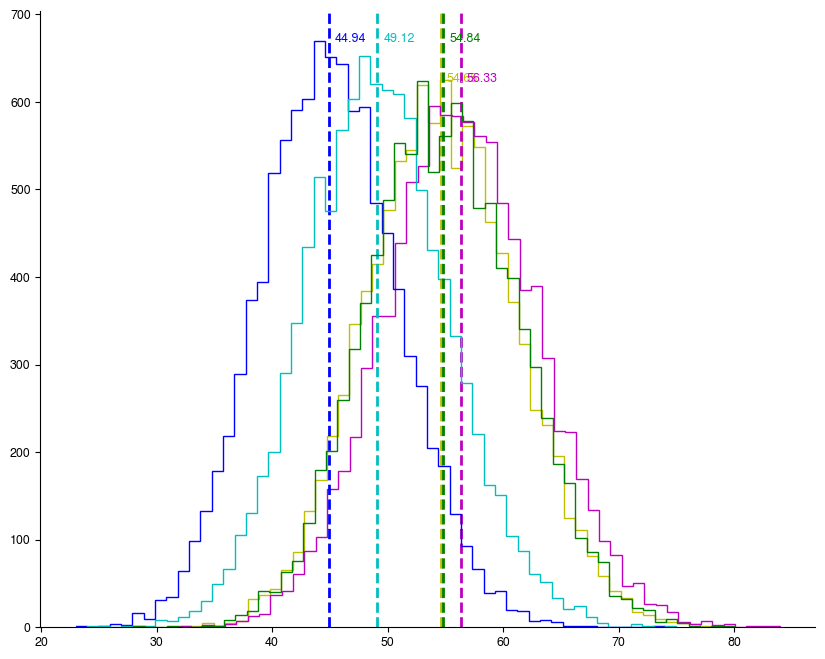

In [49]:

color_aggregates = {}
for result in simulation_results:
    for color, count in result.items():
        if color in color_aggregates:
            color_aggregates[color].append(count)
        else:
            color_aggregates[color] = [count]

plt.figure(figsize=(10, 8))
for color, counts in color_aggregates.items():

    plt.hist(counts, bins=max(counts) - min(counts) + 1, color=color_map[color], histtype='step', label=f'{color} counts')

    mean_count = np.mean(counts)
    plt.axvline(mean_count, color=color_map[color], linestyle='dashed', linewidth=2)
    plt.text(mean_count+.5, plt.ylim()[1] * 0.95, f'{mean_count:.2f}', color=color_map[color])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

